# Lab #3

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.transformation import LogTransformer

In [193]:
dataTrain = pd.read_csv('./data/train.csv')
dataTrain.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN


## 1. 

In [194]:
cols_con_na = [col for col in dataTrain.columns if (dataTrain[col].isnull().mean() > 0)]

In [195]:
cols_con_na

['total_bedrooms']

## 2.

In [196]:
prop_nan_per_col = dataTrain[cols_con_na].isnull().mean()
prop_nan_per_col

total_bedrooms    0.009483
dtype: float64

In [197]:
dataTrain[cols_con_na].isnull().value_counts()

total_bedrooms
False             14310
True                137
dtype: int64

<Axes: >

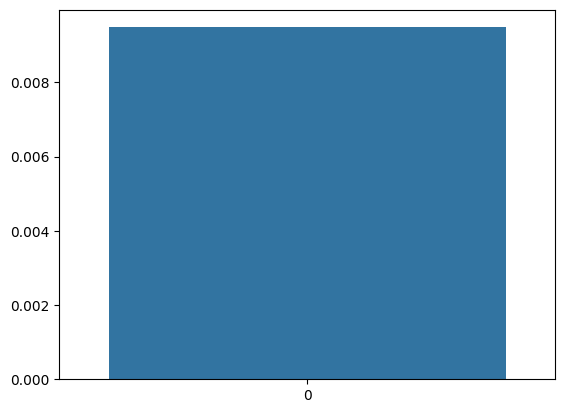

In [198]:
sns.barplot(data=prop_nan_per_col)

## 3.

In [199]:
dataTrain.dtypes

id                      int64
longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [200]:
def getColumnTypes(dataset):
    """
    Esta funcion extrae el tipo de dominio de las columnas de un dataset
    Entrada: dataset
    Salida: Tupla con arreglos que cotienen nombres de las columnas
    """

    continuas = []
    discretas = []
    categoricas = []

    for col in dataset.columns:
        if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
            if( len(dataset[col].unique()) > 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [201]:
continuas, discretas, categoricas = getColumnTypes(dataTrain)

In [202]:
continuas

['id',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [203]:
discretas

[]

#### Continuas

In [204]:
def imputacion_continuas(df,column_to_impute):
    df = df.copy()
    media = df[column_to_impute].mean()
    mediana = df[column_to_impute].median()

    df['Mean'] = np.round(df[column_to_impute].fillna(media))
    df['Median'] = np.round(df[column_to_impute].fillna(mediana))
    
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")

    fig = plt.figure()
    df[column_to_impute].plot.density(color='red', label='Original')
    df['Mean'].plot.density(color='blue', label='Media')
    df['Median'].plot.density(color='green', label='Mediana')
    plt.legend()
    
    fig = plt.figure()
    df[[column_to_impute,'Mean','Median']].boxplot()
    plt.show()

Media: 537.7787561146051
Mediana: 433.0


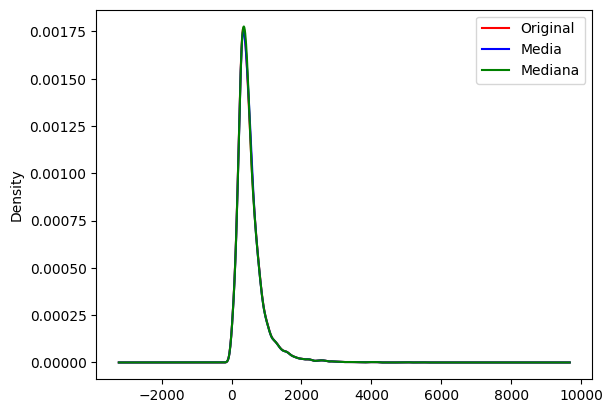

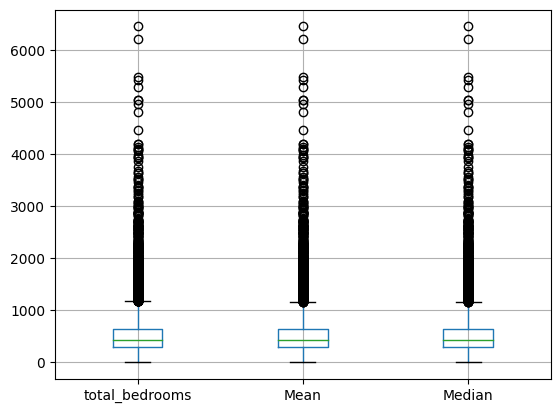

In [205]:
imputacion_continuas(dataTrain, 'total_bedrooms')

#### Imputacion
Sustituyo con media, ya que mantiene un comportamiento similar en la variable posterior a imputar

In [206]:
media = dataTrain['total_bedrooms'].mean()

In [207]:
dataTrain['total_bedrooms'] = np.round(dataTrain['total_bedrooms'].fillna(media))

In [208]:
dataTrain[cols_con_na].isnull().mean()

total_bedrooms    0.0
dtype: float64

## 4. 
No hay faltantes en variables categoricas

## 5.

In [209]:
categoricas

['ocean_proximity']

In [210]:
uvalues = dataTrain['ocean_proximity'].unique()

In [211]:
uvalues

array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [212]:
dataTrain['ocean_proximity'].value_counts()

<1H OCEAN     6384
INLAND        4577
NEAR OCEAN    1865
NEAR BAY      1619
ISLAND           2
Name: ocean_proximity, dtype: int64

In [213]:
def one_hot_feature(df, feature):
    """
    Funcion para hacer el one hot encoding
    feature = columna sobre la que se debe hacer el one hot encoding
    """
    dummies = pd.get_dummies(df[[feature]])
    dummies.add_prefix(f"{feature}__")
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature], axis=1)
    return res

In [214]:
dataTrain = one_hot_feature(dataTrain.copy(), 'ocean_proximity')

In [215]:
dataTrain.columns = [c.lower().replace(' ', '_').replace('<','') for c in dataTrain.columns]

In [216]:
dataTrain.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,1,0,0,0,0
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,0,1,0,0,0
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,1,0,0,0,0
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,0,0,0,1,0
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,1,0,0,0,0


## 6.

In [217]:
dataTrain[continuas].describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000
mean,10275.451997,-119.580422,35.642011,28.845435,2635.287534,537.780854,1425.171454,500.116772,3.863949,206873.687824
std,5957.136373,2.003511,2.135526,12.585221,2215.285809,421.997029,1123.733449,386.181946,1.892919,115263.889710
min,1.000000,-124.300000,32.540000,1.000000,2.000000,1.000000,6.000000,1.000000,0.499900,14999.000000
25%,5139.500000,-121.805000,33.930000,18.000000,1444.000000,297.000000,786.000000,280.000000,2.567150,119600.000000
50%,10210.000000,-118.500000,34.260000,29.000000,2121.000000,436.000000,1163.000000,408.000000,3.535000,179700.000000
75%,15449.000000,-118.020000,37.720000,37.000000,3137.500000,644.000000,1722.000000,604.500000,4.722850,264600.000000
max,20640.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [218]:
dataContinuas = dataTrain.copy()[continuas[1:]]

scaler = MinMaxScaler()
scaler.fit(dataContinuas) #calculamos informacion interna (parametros) para transformaciones posteriores

dataContinuas_scaled = scaler.transform(dataContinuas)
dataContinuas_scaled = pd.DataFrame(dataContinuas_scaled, columns=dataContinuas.columns)

In [219]:
continuas[1:]

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

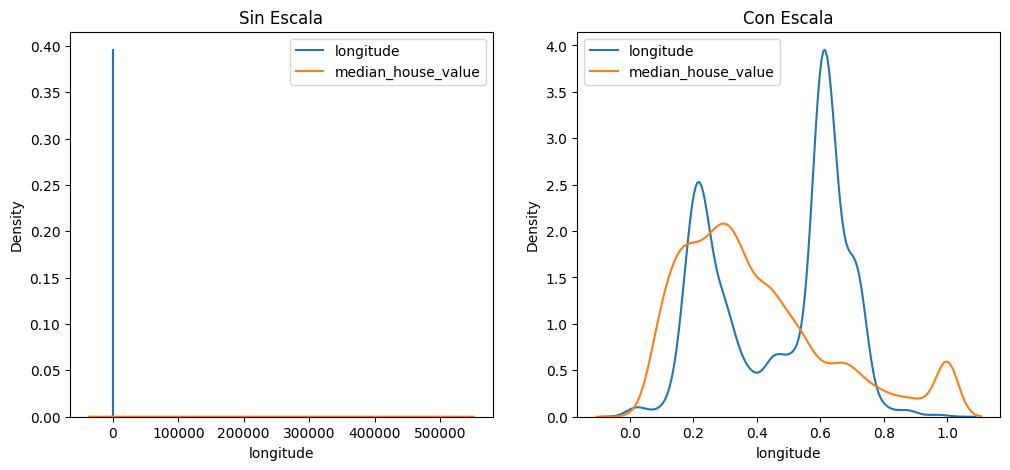

In [220]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Sin Escala")
sns.kdeplot(dataContinuas['longitude'], ax=ax1, label="longitude")
sns.kdeplot(dataContinuas['median_house_value'], ax=ax1, label="median_house_value")

ax2.set_title("Con Escala")
sns.kdeplot(dataContinuas_scaled['longitude'], ax=ax2, label="longitude")
sns.kdeplot(dataContinuas_scaled['median_house_value'], ax=ax2, label="median_house_value")

ax1.legend()
ax2.legend()

plt.show()

In [221]:
def plotScaled(original, scaled, colname, yval):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    ax1.set_title("Sin Escala")
    sns.kdeplot(original[colname], ax=ax1, label=colname)
    sns.kdeplot(original[yval], ax=ax1, label=yval)

    ax2.set_title("Con Escala")
    sns.kdeplot(scaled[colname], ax=ax2, label=colname)
    sns.kdeplot(scaled[yval], ax=ax2, label=yval)

    ax1.legend()
    ax2.legend()

    plt.show()

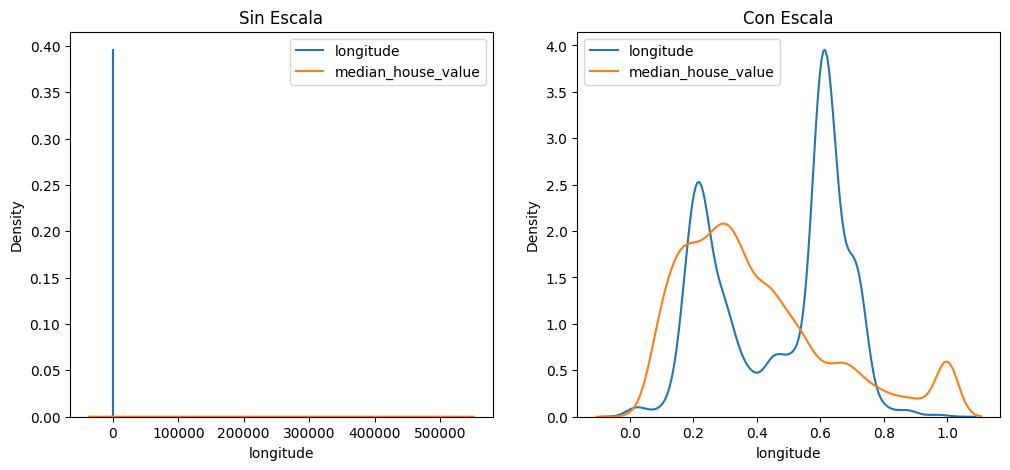

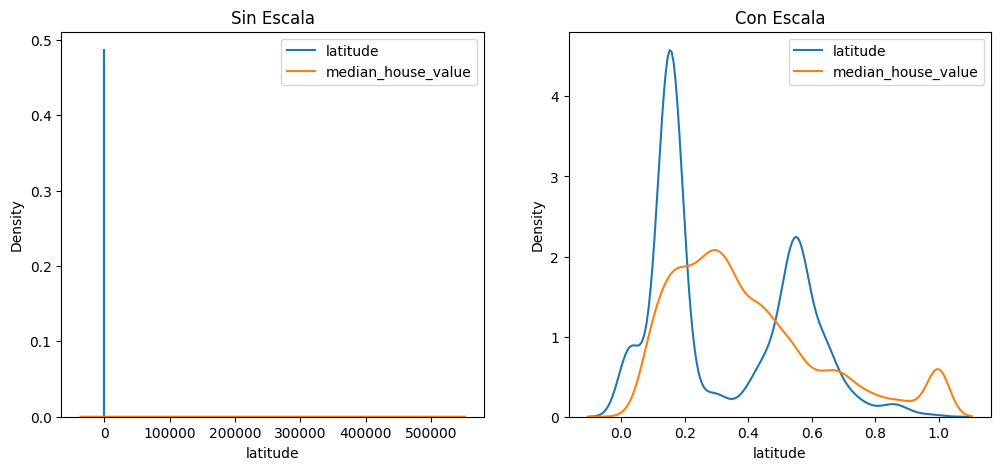

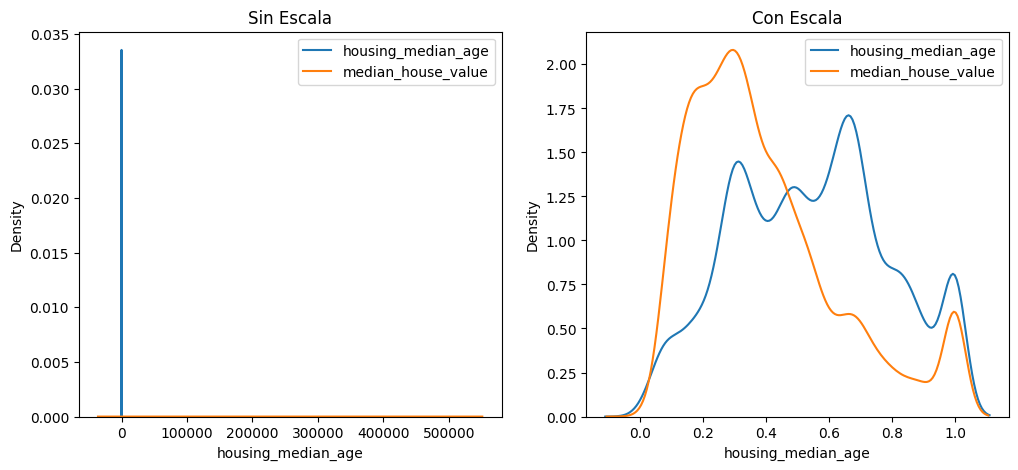

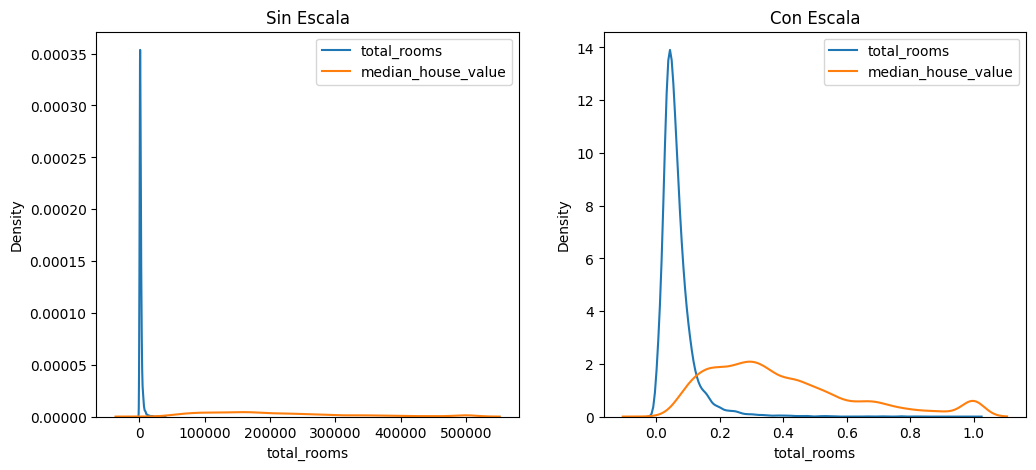

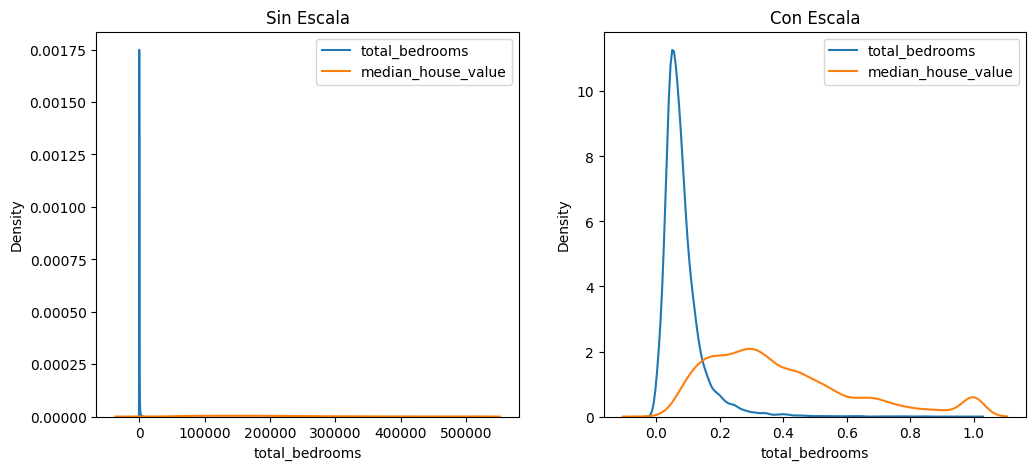

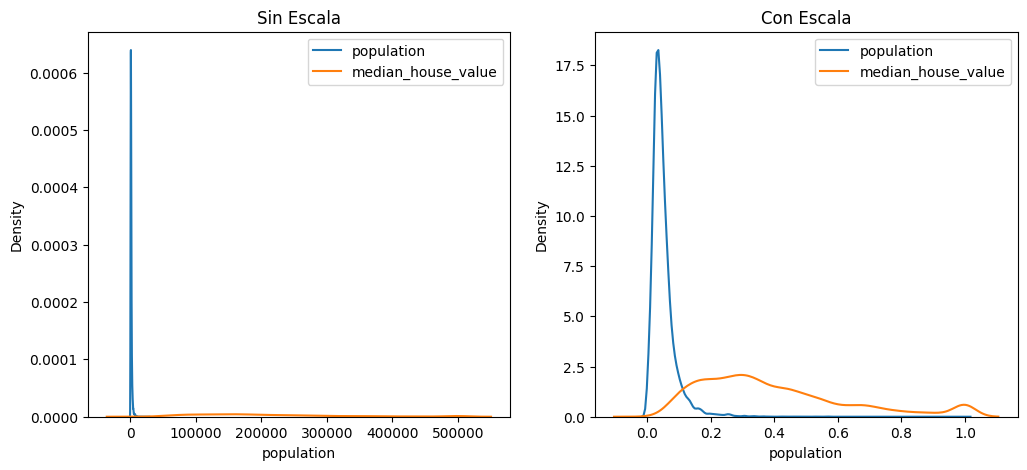

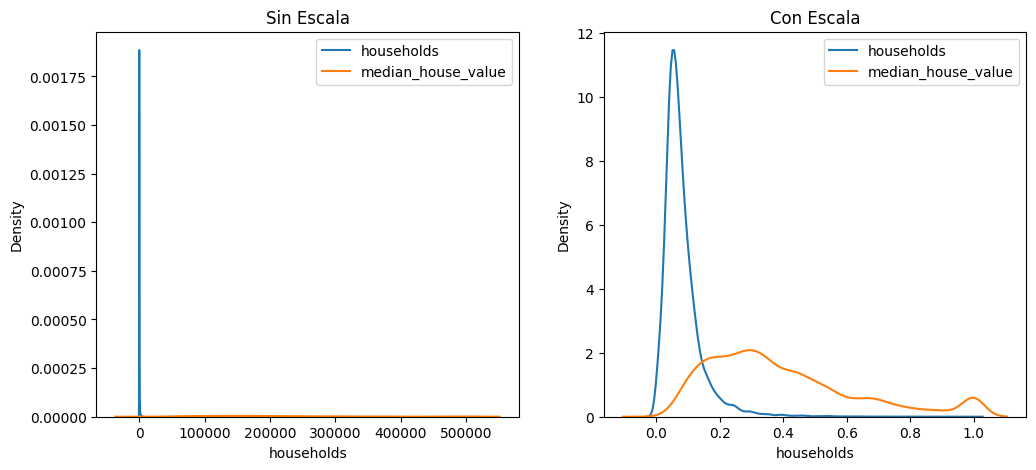

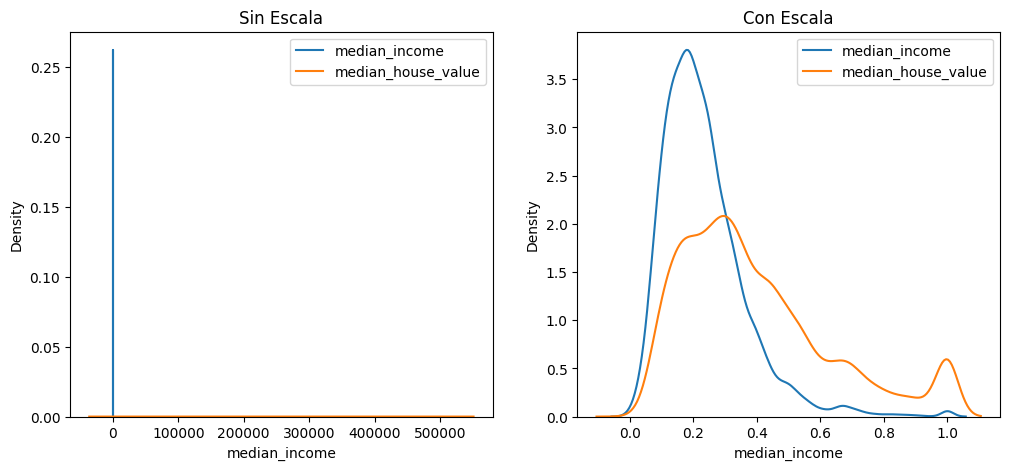

In [222]:
ycol = 'median_house_value'
for colname in continuas[1:]:
    if colname != ycol:
        plotScaled(dataContinuas, dataContinuas_scaled, colname, ycol)
    else:
        continue

In [223]:
# Substituimos las escalas
for colname in continuas[1:]:
    dataTrain[colname] = dataContinuas_scaled[colname]

In [224]:
dataTrain.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
0,9744,0.265265,0.449522,0.274510,0.055674,0.055400,0.040056,0.054103,0.296341,0.438145,1,0,0,0,0
1,13893,0.803804,0.168969,0.705882,0.011445,0.016760,0.006232,0.009538,0.222707,0.104744,0,1,0,0,0
2,18277,0.223223,0.510096,0.666667,0.029757,0.028399,0.017717,0.028614,0.472835,1.000000,1,0,0,0,0
3,16176,0.191191,0.552604,1.000000,0.003154,0.003569,0.001085,0.004276,0.670784,0.432990,0,0,0,1,0
4,8843,0.592593,0.164718,0.529412,0.101709,0.209652,0.062780,0.200460,0.143343,0.531752,1,0,0,0,0


## 7.

In [225]:
x_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms','population','households', 'median_income', 'ocean_proximity_1h_ocean','ocean_proximity_inland', 'ocean_proximity_island','ocean_proximity_near_bay', 'ocean_proximity_near_ocean']

In [226]:
X = dataTrain[x_columns]
y = dataTrain['median_house_value']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2023)

In [228]:
from sklearn.linear_model import Lasso

In [229]:
model = Lasso(alpha=0.01)

In [230]:
model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [231]:
predictions = model.predict(X_test)

In [232]:
rmseTest = np.sqrt(mean_squared_error(y_test, predictions))

In [233]:
rmseTest

0.1737392171034697

In [234]:
np.min(y_train), np.max(y_train)

(0.015465915604471737, 1.0)

In [235]:
rmseTest / (np.max(y_train) - np.min(y_train))

0.17646846346629017

## 8. Pipeline

In [236]:
dfTrain = pd.read_csv('./data/train.csv')

In [237]:
x_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms','population','households', 'median_income', 'ocean_proximity']

In [238]:
X = dfTrain[x_columns]
y = dfTrain['median_house_value']

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2023)

In [240]:
NUMERICAL_VARS_WITH_NA = ['total_bedrooms']

In [241]:
CATEGORICAL_VARIABLES = ['ocean_proximity']

In [242]:
lab3_pipeline = Pipeline([
    #======== IMPUTACIONES =============
    
    # 1. Imputacion para variables numericas
    ('mean_imputation', 
        MeanMedianImputer(imputation_method='mean', variables=NUMERICAL_VARS_WITH_NA)),
    
    # 2. Codificacion de variables categoricas
    ('ocean_proximity_mapper', 
       OneHotEncoder(variables=CATEGORICAL_VARIABLES)),

    # 3. Feature Scaling
    ('scaler',
        MinMaxScaler()),
    
    # 4. Modelo
    ('modelo_lasso', 
         Lasso(alpha=0.01, random_state=2022)
    )
])

In [243]:
lab3_pipeline.fit(X_train, y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+12, tolerance: 1.329e+10
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['total_bedrooms'])),
                ('ocean_proximity_mapper',
                 OneHotEncoder(variables=['ocean_proximity'])),
                ('scaler', MinMaxScaler()),
                ('modelo_lasso', Lasso(alpha=0.01, random_state=2022))])

In [244]:
preds = lab3_pipeline.predict(X_test)

In [245]:
preds

array([315153.83234763, 387090.60409674, 220700.67640049, ...,
       244082.40406888, 192674.53984747, 590194.21398738])

In [246]:
y_test

12607    362300.0
13211    379600.0
12576    213200.0
8209     220300.0
8554     237500.0
           ...   
2319      67400.0
979       68000.0
6034     177800.0
13688    132000.0
8400     500001.0
Name: median_house_value, Length: 4335, dtype: float64

In [247]:
rmseTest = np.sqrt(mean_squared_error((y_test), (preds)))
rmseTest

69683.5768194427

In [248]:
rmseTest / (np.max(y_train) - np.min(y_train))

0.1459338866713215

## 8.1 obtener dataframe con modificaciones

In [264]:
lab3_pipeline_fe = Pipeline([
    #======== IMPUTACIONES =============
    
    # 1. Imputacion para variables numericas
    ('mean_imputation', 
        MeanMedianImputer(imputation_method='mean', variables=NUMERICAL_VARS_WITH_NA)),
    
    # 2. Codificacion de variables categoricas
    ('ocean_proximity_mapper', 
       OneHotEncoder(variables=CATEGORICAL_VARIABLES)),
    
    # 3. Feature Scaling
    ('scaler',
        MinMaxScaler())
])

In [250]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1220,-118.11,33.95,34,1723,279.0,617,252,6.7501,<1H OCEAN
6446,-120.43,34.93,10,2980,585.0,1593,562,3.2850,<1H OCEAN
10521,-122.35,37.93,39,2002,416.0,1166,395,1.7257,NEAR BAY
13367,-118.44,34.29,32,1260,382.0,1434,342,2.0286,<1H OCEAN
4439,-121.80,37.31,21,2630,446.0,1789,389,5.0543,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
5852,-122.03,37.35,25,3095,514.0,1251,507,5.5388,<1H OCEAN
6049,-117.88,33.78,26,3141,670.0,1572,724,3.3472,<1H OCEAN
2743,-118.44,35.13,21,1899,447.0,1133,391,1.8636,INLAND
5657,-115.53,32.97,34,2231,545.0,1568,510,1.5217,INLAND


In [265]:
lab3_pipeline_fe.fit(X_train)

Pipeline(steps=[('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['total_bedrooms'])),
                ('ocean_proximity_mapper',
                 OneHotEncoder(variables=['ocean_proximity'])),
                ('scaler', MinMaxScaler())])

In [266]:
df_transformed = pd.DataFrame(lab3_pipeline_fe.transform(X_train))

In [267]:
df_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.619620,0.149841,0.647059,0.043674,0.043141,0.021325,0.041276,0.431042,1.0,0.0,0.0,0.0,0.0
1,0.387387,0.253985,0.176471,0.075647,0.090627,0.055501,0.092255,0.192073,1.0,0.0,0.0,0.0,0.0
2,0.195195,0.572795,0.745098,0.050771,0.064401,0.040549,0.064792,0.084537,0.0,1.0,0.0,0.0,0.0
3,0.586587,0.185972,0.607843,0.031897,0.059125,0.049933,0.056076,0.105426,1.0,0.0,0.0,0.0,0.0
4,0.250250,0.506908,0.392157,0.066745,0.069056,0.062364,0.063805,0.314092,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,0.227227,0.511158,0.470588,0.078573,0.079609,0.043525,0.083210,0.347506,1.0,0.0,0.0,0.0,0.0
10108,0.642643,0.131775,0.490196,0.079743,0.103818,0.054766,0.118895,0.196363,1.0,0.0,0.0,0.0,0.0
10109,0.586587,0.275239,0.392157,0.048151,0.069212,0.039394,0.064134,0.094047,0.0,0.0,1.0,0.0,0.0
10110,0.877878,0.045696,0.647059,0.056596,0.084420,0.054626,0.083703,0.070468,0.0,0.0,1.0,0.0,0.0


In [268]:
df_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms','population','households', 'median_income', 'ocean_proximity_1h_ocean','ocean_proximity_inland', 'ocean_proximity_island','ocean_proximity_near_bay', 'ocean_proximity_near_ocean']

In [269]:
df_transformed.columns = df_columns

In [270]:
df_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
0,0.619620,0.149841,0.647059,0.043674,0.043141,0.021325,0.041276,0.431042,1.0,0.0,0.0,0.0,0.0
1,0.387387,0.253985,0.176471,0.075647,0.090627,0.055501,0.092255,0.192073,1.0,0.0,0.0,0.0,0.0
2,0.195195,0.572795,0.745098,0.050771,0.064401,0.040549,0.064792,0.084537,0.0,1.0,0.0,0.0,0.0
3,0.586587,0.185972,0.607843,0.031897,0.059125,0.049933,0.056076,0.105426,1.0,0.0,0.0,0.0,0.0
4,0.250250,0.506908,0.392157,0.066745,0.069056,0.062364,0.063805,0.314092,1.0,0.0,0.0,0.0,0.0


In [271]:
df_transformed.to_csv('./data/transformed.csv')